In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/email-phishing-dataset/email_phishing_data.csv


# Lets explore the data

In [5]:
df = pd.read_csv("/kaggle/input/email-phishing-dataset/email_phishing_data.csv")
df.head(3)

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
0,140,94,52,0,0,0,0,0,0
1,5,5,1,0,0,0,0,0,0
2,34,32,15,0,0,0,0,0,0


In [6]:
df.shape

(524846, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524846 entries, 0 to 524845
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   num_words            524846 non-null  int64
 1   num_unique_words     524846 non-null  int64
 2   num_stopwords        524846 non-null  int64
 3   num_links            524846 non-null  int64
 4   num_unique_domains   524846 non-null  int64
 5   num_email_addresses  524846 non-null  int64
 6   num_spelling_errors  524846 non-null  int64
 7   num_urgent_keywords  524846 non-null  int64
 8   label                524846 non-null  int64
dtypes: int64(9)
memory usage: 36.0 MB


In [8]:
df.isnull().sum()

num_words              0
num_unique_words       0
num_stopwords          0
num_links              0
num_unique_domains     0
num_email_addresses    0
num_spelling_errors    0
num_urgent_keywords    0
label                  0
dtype: int64

In [9]:
df.label.value_counts()

label
0    517897
1      6949
Name: count, dtype: int64

In [10]:
df.num_unique_domains.value_counts()

num_unique_domains
0      431424
1       62638
2       14525
3        6421
4        3912
        ...  
88          2
33          2
123         1
524         1
46          1
Name: count, Length: 82, dtype: int64

# Eda

In [11]:
numeric_columns =['num_words', 'num_unique_words', 'num_stopwords', 'num_links',
       'num_unique_domains', 'num_email_addresses', 'num_spelling_errors',
       'num_urgent_keywords']

In [12]:
df[numeric_columns].describe()

,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords
count,5.248460e+05,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000,524846.000000
mean,2.762280e+02,123.012167,80.045465,0.895588,0.347767,2.114897,24.694731,0.245301
std,3.335457e+03,201.626478,1023.330380,5.603001,1.774209,13.592682,311.312358,0.559320
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.700000e+01,38.000000,12.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,1.200000e+02,79.000000,34.000000,0.000000,0.000000,0.000000,8.000000,0.000000
75%,2.690000e+02,145.000000,79.000000,0.000000,0.000000,1.000000,22.000000,0.000000
max,2.339682e+06,51251.000000,720411.000000,824.000000,524.000000,1150.000000,190104.000000,7.000000


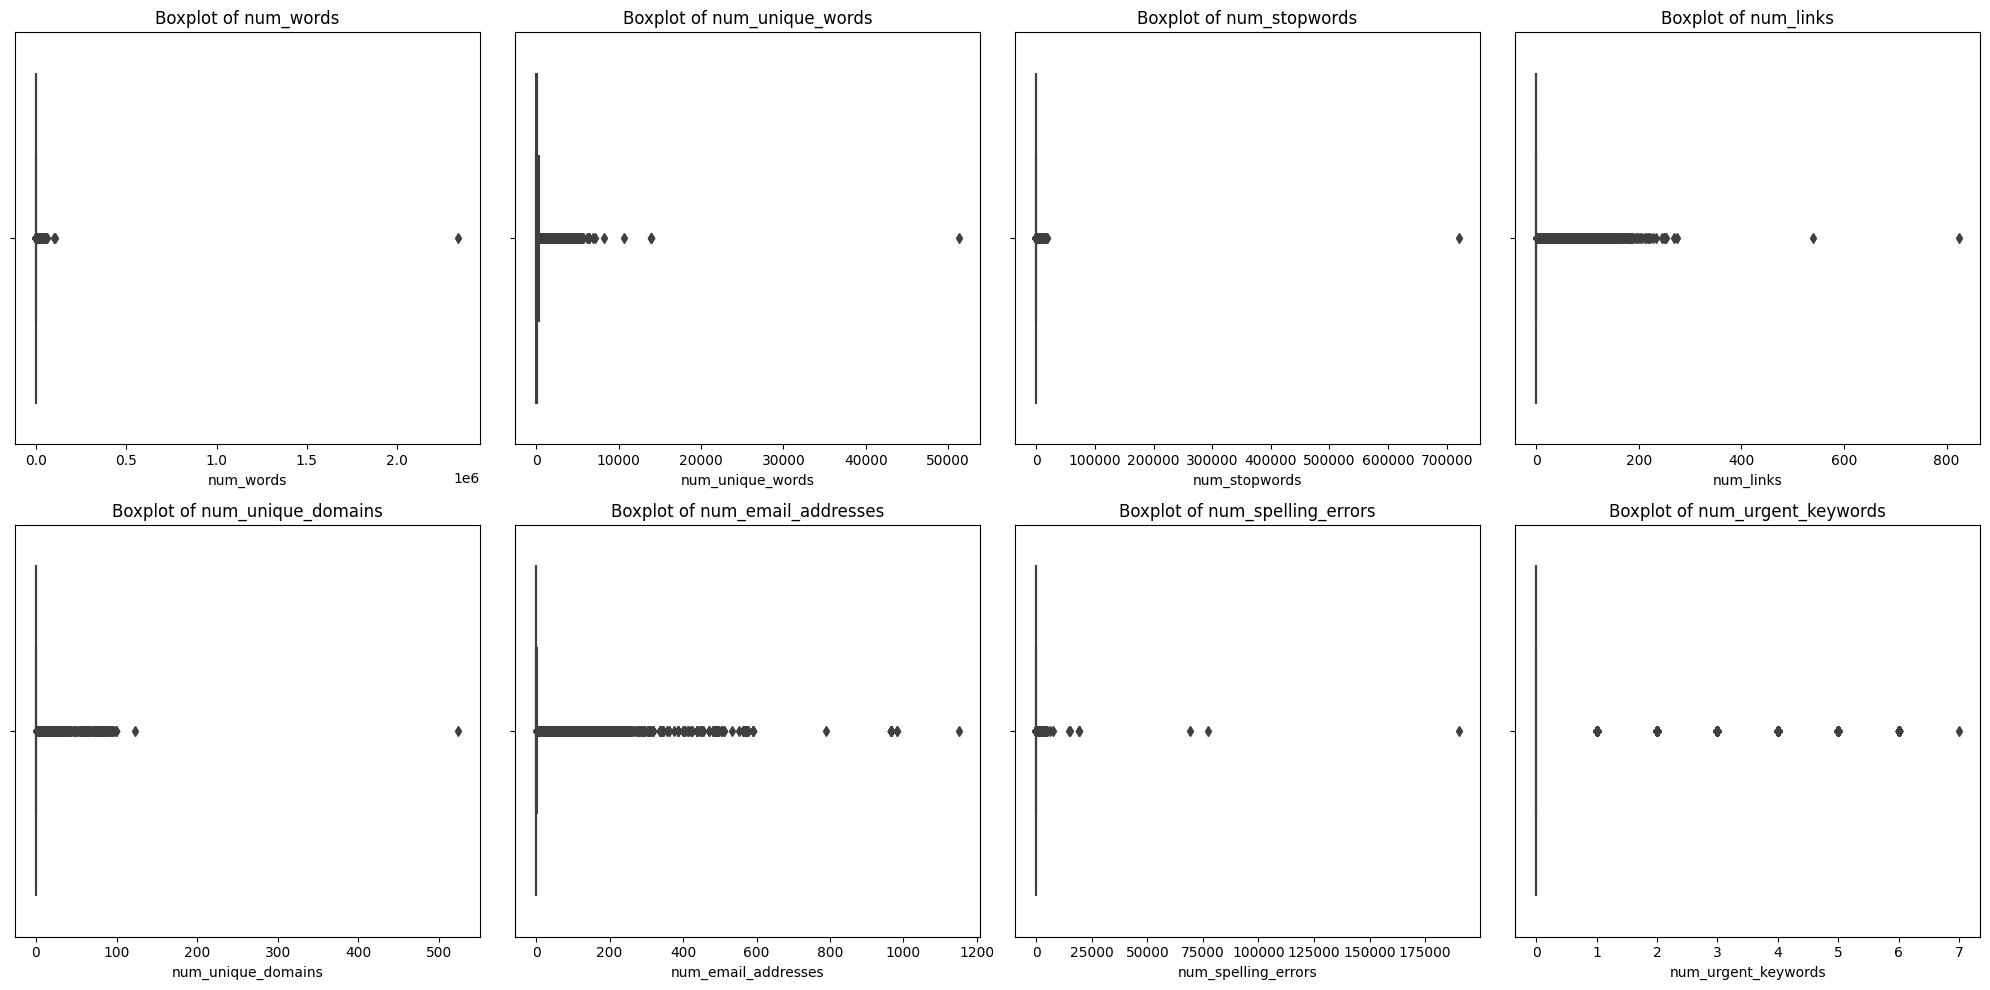

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # 2 rows, 4 columns
axes = axes.flatten()  # Flatten the axes array for easy indexing

for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}', fontsize=12)

plt.tight_layout()
plt.show()

In [14]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply IQR method to each numeric column
for col in numeric_columns:
    df = remove_outliers_iqr(df, col)


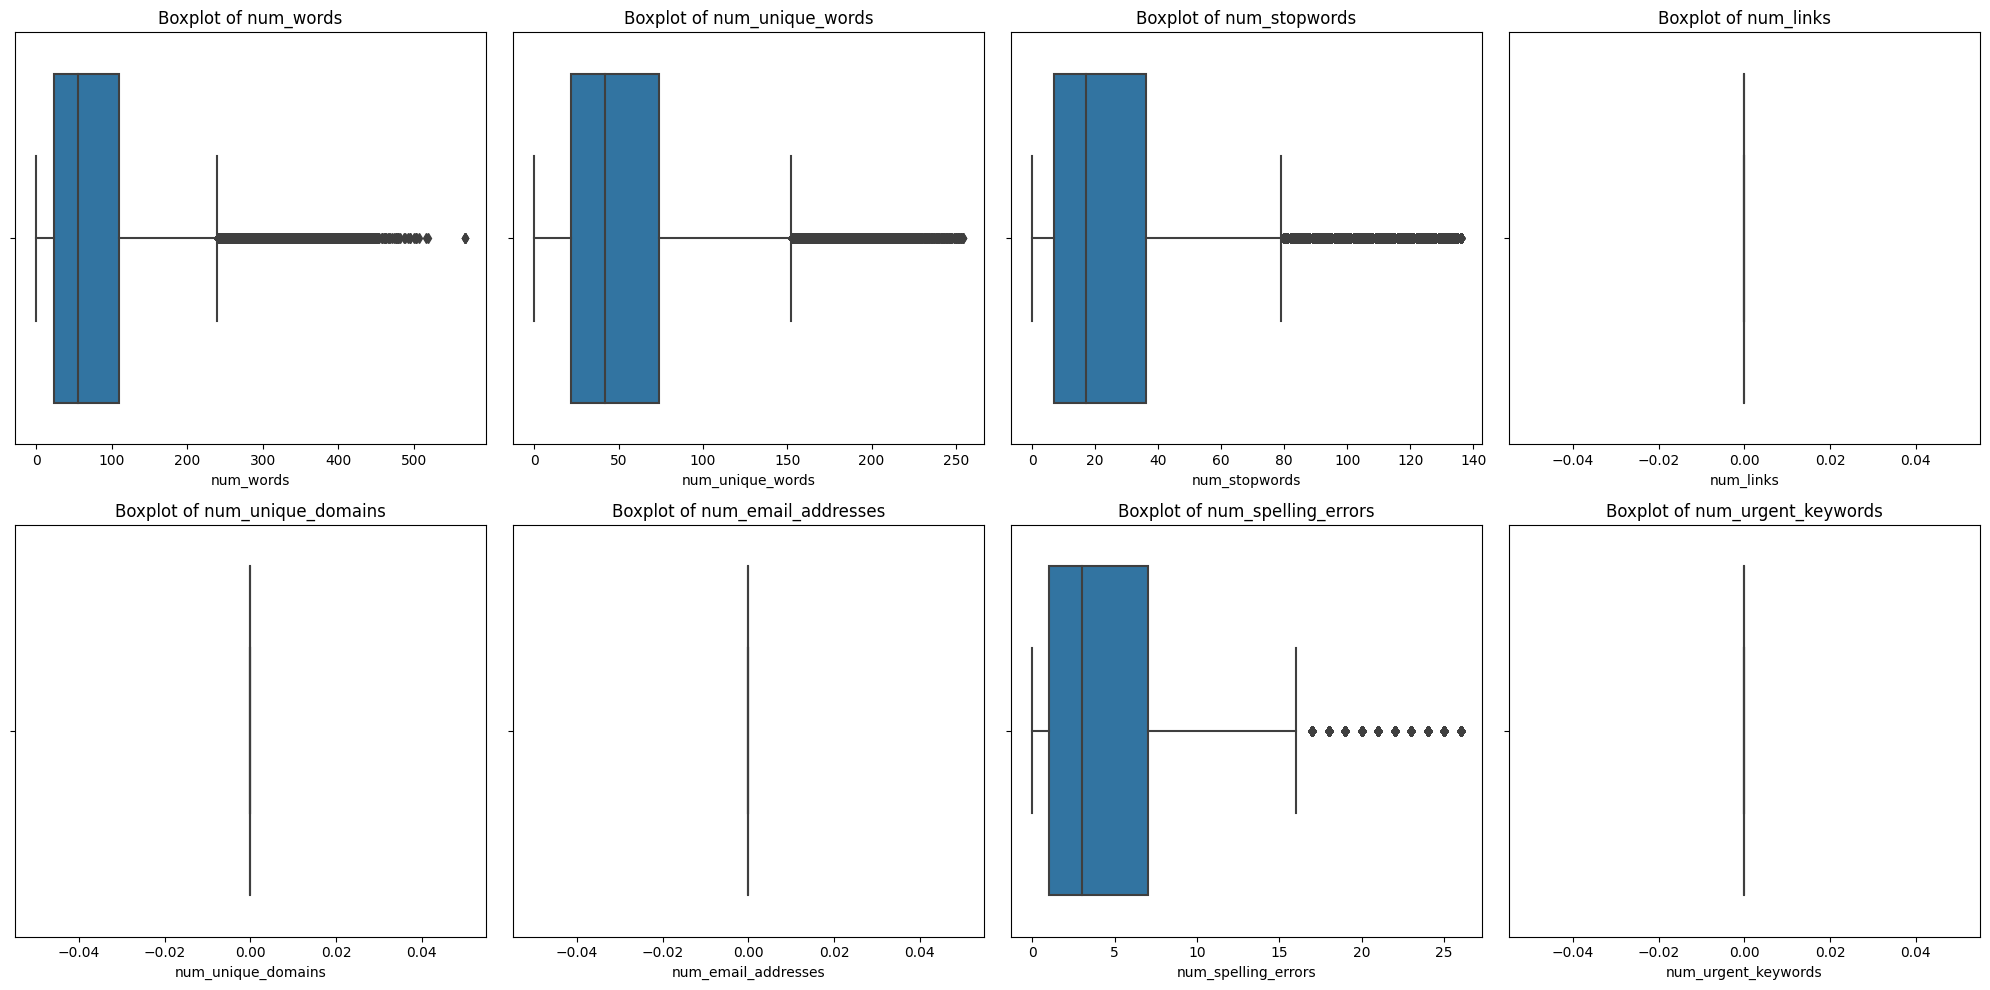

In [15]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # 2 rows, 4 columns
axes = axes.flatten()  # Flatten the axes array for easy indexing

for i, col in enumerate(numeric_columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}', fontsize=12)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

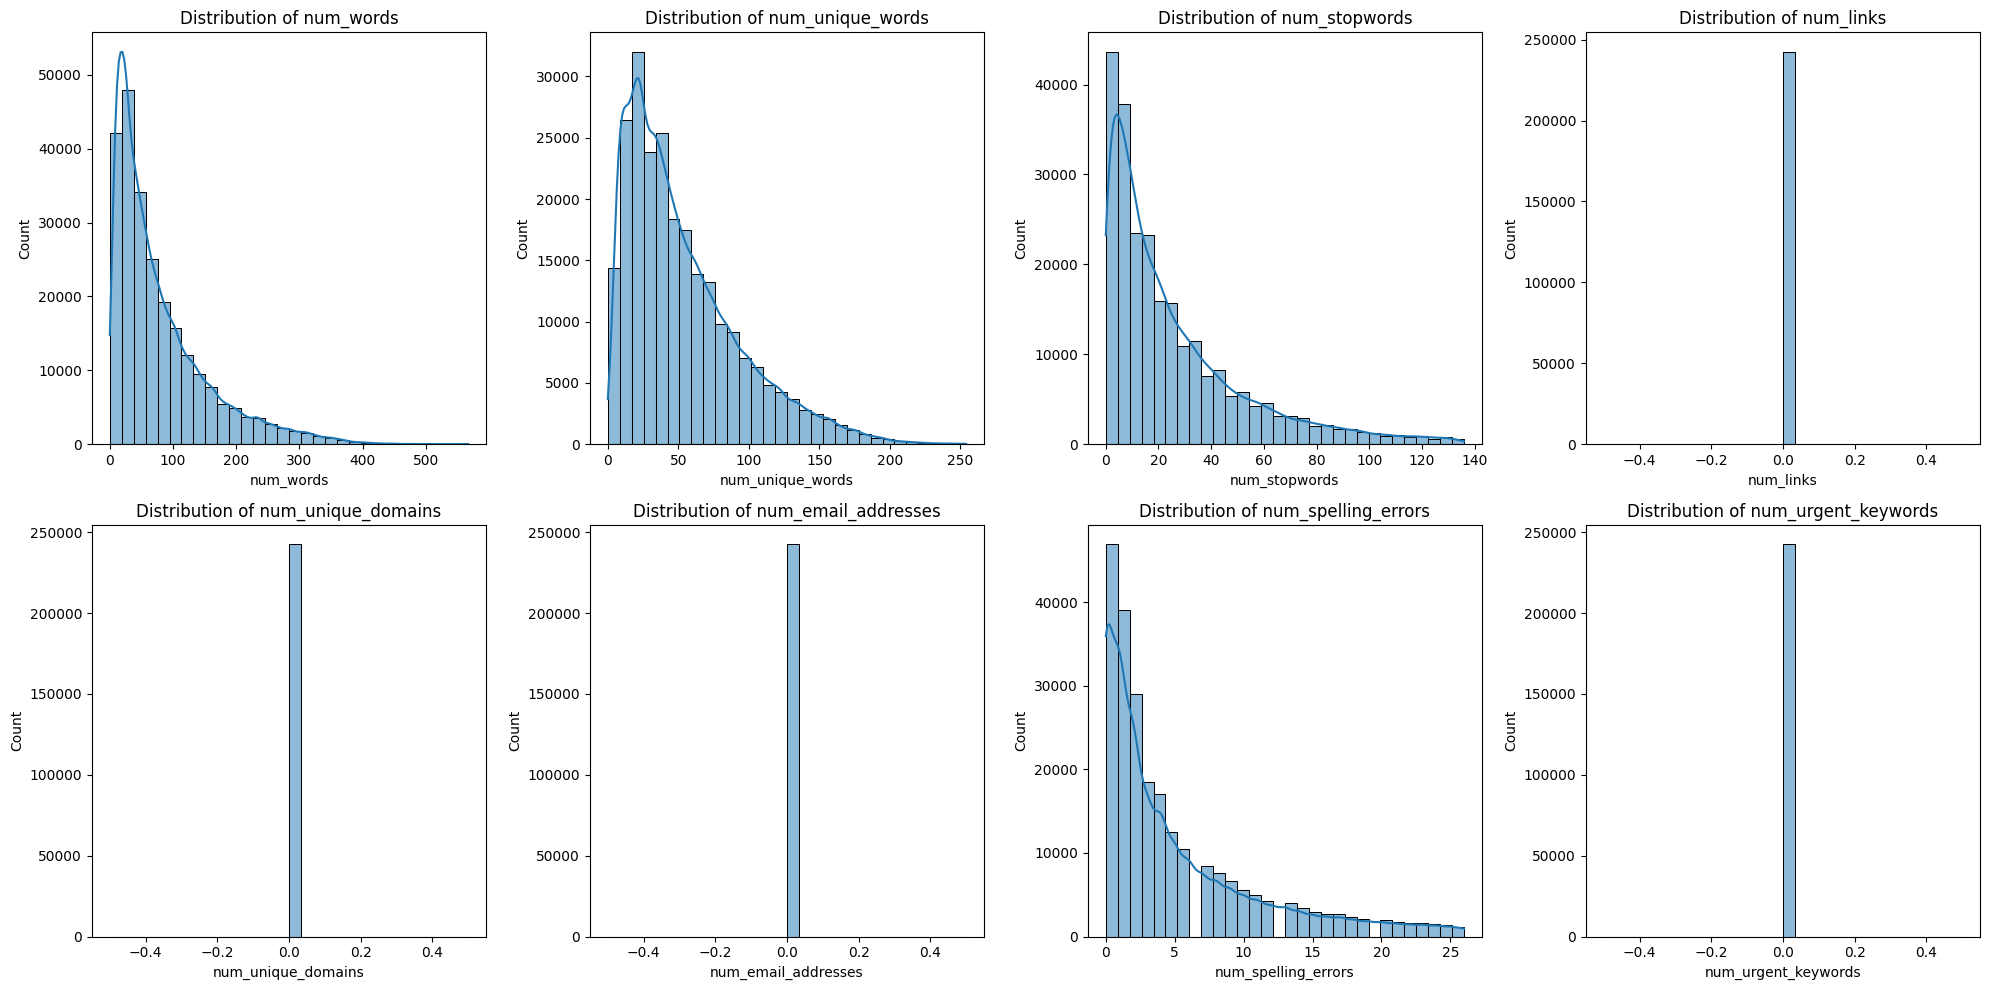

In [22]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # 2 rows, 4 columns
axes = axes.flatten()  # Flatten the 2D array of axes

for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()



/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


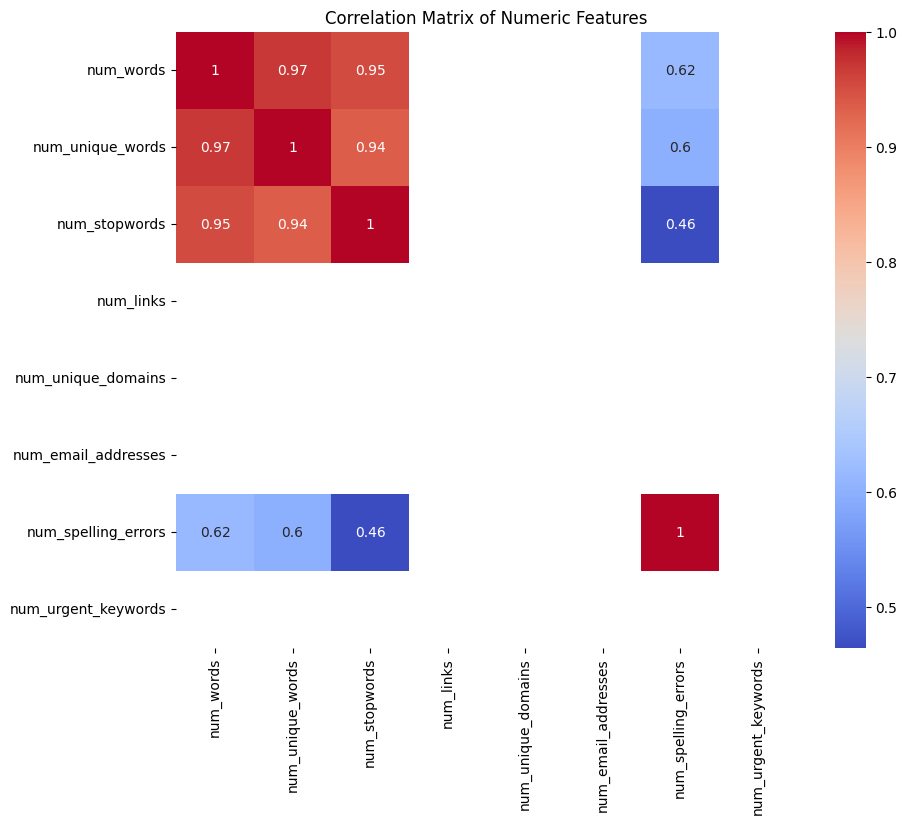

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [18]:
df[numeric_columns].skew().sort_values(ascending=False)


num_stopwords          1.611886
num_words              1.588144
num_spelling_errors    1.528046
num_unique_words       1.194962
num_links              0.000000
num_unique_domains     0.000000
num_email_addresses    0.000000
num_urgent_keywords    0.000000
dtype: float64

# Modelling 

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X = df.drop('label', axis=1)
y = df['label']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Random Oversampling
# Separate the majority and minority classes
df_majority = df[df['label'] == 0]
df_minority = df[df['label'] == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    
                                 n_samples=len(df_majority), 
                                 random_state=42)

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the dataframe
df_upsampled = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate the features and target after upsampling
X_train_upsampled = df_upsampled.drop('label', axis=1)
y_train_upsampled = df_upsampled['label']

# 2. Scale the data using StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train_upsampled)
X_test_scaled = scaler.transform(X_test)

# Initialize classifiers



In [20]:
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    #'SVM': SVC(class_weight='balanced', random_state=42),
    'XGBoost': XGBClassifier(scale_pos_weight=10, random_state=42)  # Adjust scale_pos_weight based on class imbalance
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f'\nTraining {model_name}...')
    
    # Train the model
    model.fit(X_train_scaled, y_train_upsampled)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    print(f'Performance of {model_name}:')
    print(classification_report(y_test, y_pred))
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')




Training Logistic Regression...
Performance of Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      0.75      0.85     71541
           1       0.04      0.64      0.08      1187

    accuracy                           0.75     72728
   macro avg       0.52      0.70      0.46     72728
weighted avg       0.98      0.75      0.84     72728

Accuracy: 0.7464525354746453


Training Random Forest...
Performance of Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71541
           1       0.41      0.98      0.58      1187

    accuracy                           0.98     72728
   macro avg       0.71      0.98      0.79     72728
weighted avg       0.99      0.98      0.98     72728

Accuracy: 0.9770927290727093


Training XGBoost...
Performance of XGBoost:
              precision    recall  f1-score   support

           0       1.00      0.49      0.66     71541
      

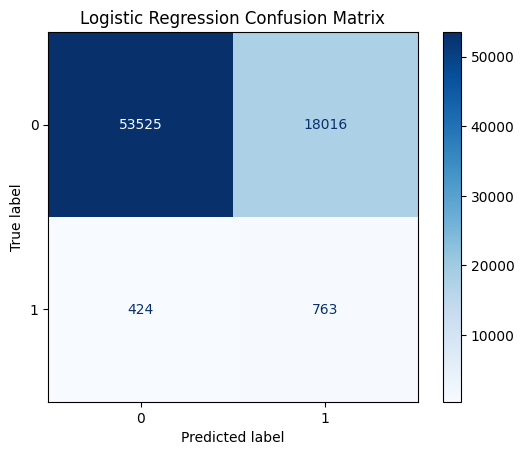

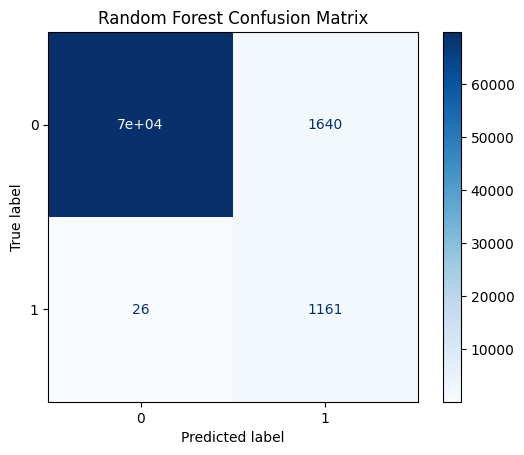

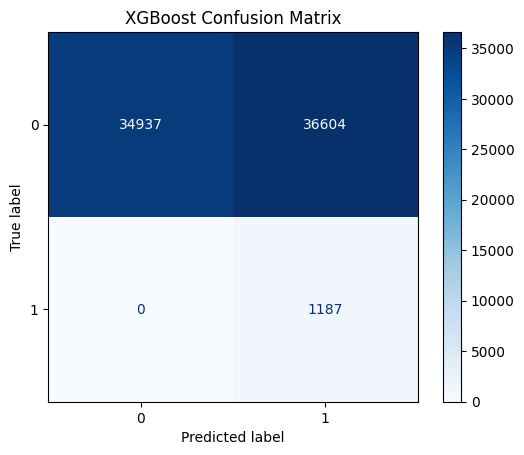

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

# Conclusion

In the initial experiment with various classifiers, Logistic Regression outperformed others with an accuracy of 74% and a recall of 64%. In contrast, tree-based models like Random Forest and XGBoost did not yield satisfactory results. This suggests that simpler linear models may be more effective for this particular dataset or feature set.